In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
def generate_sample(x_min=-3., x_max=3., sample_size=10):
    x = np.linspace(x_min, x_max, num=sample_size)
    y = x + np.random.normal(loc=0., scale=.2, size=sample_size)
    y[-1] = y[-2] = y[1] = -4  # outliers
    return x, y

In [3]:
def MSE(y_hat, y):
    return(np.linalg.norm(y_hat - y, ord = 2) ** 2) / len(y)

In [4]:
class GaussianKernelL1Regression:
    
    def __init__(self, _lambda = 0.01, h = 1, total_step=1000):
        self._lambda = _lambda
        self.h = h
        self.total_step = total_step
    
    def K(self,x1,x2, h):
        return np.exp(-(np.linalg.norm(x1 - x2, ord=2) ** 2)/(2* (h ** 2)))

    def K_matrix(self, x, y, h):
        return np.array([self.K(i,j,h) for i in x for j in y]).reshape(len(x),len(y))
    
    def train_step(self, theta, z, u, K):
        theta = np.matmul(np.linalg.inv(np.matmul(K,K) + np.eye(len(K))), \
                          (np.matmul(K, y) + z - u))
        z = np.max(np.array([np.zeros(len(theta)), theta + u - self._lambda]),axis = 0) \
        - np.max(np.array([np.zeros(len(theta)), - theta - u - self._lambda]),axis=0)
        u = u + theta - z
        return theta, z, u

    def fit(self, X, y):
        K = self.K_matrix(X,X,self.h)
        self.X = X
        #the initial values set randomly
        theta = np.ones(len(y))
        z = np.ones(len(y)) * 100
        u = np.ones(len(y)) * 30
        for i in range(self.total_step):
            theta, z, u = self.train_step(theta, z, u, K)
            
        self.theta = theta
        
    def predict(self, X):
        return np.matmul(self.K_matrix(X, self.X, self.h), self.theta)

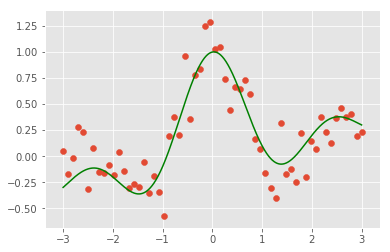

In [5]:
#Data Generation
x, y = gen_data(60)
plt.plot(np.linspace(-3,3, 1000), f(np.linspace(-3,3, 1000)), color = "g")
plt.scatter(x,y)

MSE : 0.037668466615


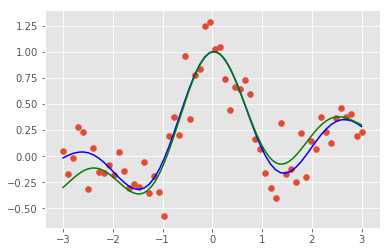

In [6]:
#Modeling
model = GaussianKernelL1Regression()
model.fit(x[:, np.newaxis],y)
y_hat = model.predict(x[:, np.newaxis])

#Sort for plotting
ind = np.argsort(x)
x = x[ind]
y = y[ind]
y_hat = y_hat[ind]

print("MSE :", MSE(y_hat, y))

plt.plot(x, y_hat, color = "b")
plt.plot(np.linspace(-3,3, 1000), f(np.linspace(-3,3, 1000)), color = "g")
plt.scatter(x,y)

In [7]:
theta = model.theta
print("the total number of variables : ",len(theta))
print("the number of variables which value is 0 : ", np.sum(np.abs(theta) < 1e-6))

the total number of variables :  60
the number of variables which value is 0 :  41
